# PGxPOP output

In [1]:
import pandas as pd
import squarify
import matplotlib
import matplotlib.pyplot as plt

from pathlib import Path

%config InlineBackend.figure_format = 'retina'


In [8]:

# Column names to account for "additional_column" in output
col_names = [
    "sample_id", "gene", "diplotype", "hap_1", "hap_2",
    "hap_1_function", "hap_2_function", "hap_1_variants", "hap_2_variants",
    "phenotype", "hap_1_presumptive", "hap_2_presumptive", "phenotype_presumptive",
    "activity_score", "uncallable", "additional_column", "extra_variants"
]

# imputed data calls
cyp2c19 = pd.read_csv('data/chr10.pgxpopout', header=None, skiprows=1, names=col_names)
cyp2d6 = pd.read_csv('data/chr22.pgxpopout', header=None, skiprows=1, names=col_names)

# exome sequence calls
cyp2c19_wes = pd.read_csv('data/chr10_wes.pgxpopout', header=None, skiprows=1, names=col_names)
cyp2d6_wes = pd.read_csv('data/chr22_wes.pgxpopout', header=None, skiprows=1, names=col_names)

# merged calls
cyp2c19_merged = pd.read_csv('data/chr10_wes.pgxpopout', header=None, skiprows=1, names=col_names)

In [3]:
def pheno_counts(data):
    """Generate dataframe of metabolizing phenotype counts
    
    data: pgxpop output as dataframe
    """
    df = (pd.DataFrame(data['phenotype_presumptive'].value_counts())
          .reset_index()
          .rename(columns={'index': 'phenotype', 'phenotype_presumptive': 'count'}))
    
    df['phenotype'] = df['phenotype'].str.replace(' Metabolizer', '').str.lower()
    df['frequency'] = [round(cnt / df['count'].sum(), 2) for cnt in df['count']]
    return df

<br>

__CYP2C19 metabolizing phenotype counts__

<br>

Imputed genetic data phenotype counts

In [4]:
cyp2c19_cnt = pheno_counts(cyp2c19)
cyp2c19_cnt

,phenotype,count,frequency
0,normal,73397,0.40
1,intermediate,49174,0.27
2,rapid,48779,0.26
3,ultrarapid,8383,0.05
4,poor,5096,0.03
5,not available,94,0.00
6,likely intermediate,87,0.00
7,indeterminate,52,0.00
8,likely poor,28,0.00


<br>

Exome sequence data phenotype counts

In [5]:
cyp2c19_wes_cnt = pheno_counts(cyp2c19_wes)
cyp2c19_wes_cnt

,phenotype,count,frequency
0,normal,129993,0.70
1,intermediate,49480,0.27
2,poor,5150,0.03
3,not available,181,0.00
4,likely intermediate,128,0.00
5,indeterminate,119,0.00
6,likely poor,39,0.00


<br>

Merged imputed and exome sequence data phenotype counts

In [9]:
cyp2c19_merged_cnt = pheno_counts(cyp2c19_merged)
cyp2c19_merged_cnt

,phenotype,count,frequency
0,normal,129993,0.70
1,intermediate,49480,0.27
2,poor,5150,0.03
3,not available,181,0.00
4,likely intermediate,128,0.00
5,indeterminate,119,0.00
6,likely poor,39,0.00


<br>

__CYP2D6 metabolizing phenotype counts__

<br>

Imputed data phenotype counts

In [6]:
cyp2d6_cnt = pheno_counts(cyp2d6)
cyp2d6_cnt

,phenotype,count,frequency
0,normal,97514,0.53
1,indeterminate,60951,0.33
2,not available,23794,0.13
3,intermediate,2806,0.02
4,poor,25,0.00


<br>

Exome sequence data phenotype counts

In [7]:
cyp2d6_wes_cnt = pheno_counts(cyp2d6_wes)
cyp2d6_wes_cnt

,phenotype,count,frequency
0,not available,185086,1.0
1,poor,4,0.0


Barplot

In [ ]:
ax = pd.DataFrame(df['phenotype'].value_counts()).plot(kind='bar', legend=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Treemap

In [81]:
color_dict = {
    'poor': '#8ECAE6',
    'likely poor': '#8ECAE6',
    'intermediate': '#219EBC',
    'likely intermediate': '#219EBC',
    'normal': '#023047',
    'rapid': '#FFB703',
    'ultrarapid': '#FB8500',
    'indeterminate': 'grey',
    'not available': 'black'
}

cyp2c19_cnt['color'] = [color_dict[pheno] for pheno in cyp2c19_cnt['phenotype']]
cyp2d6_cnt['color'] = [color_dict[pheno] for pheno in cyp2d6_cnt['phenotype']]

def tree_map(cnt, freq=0.01):
    """Treemap of matabolizing phenotype counts
    
    cnt: dataframe produced by pheno_counts"""
    
    cnt = cnt[cnt['frequency'].gt(freq)]
    squarify.plot(
        sizes=cnt['count'],
        label=cnt['phenotype'],
        alpha=.8,
        pad=True,
        color=cnt['color'])
    plt.axis('off')
    plt.show()

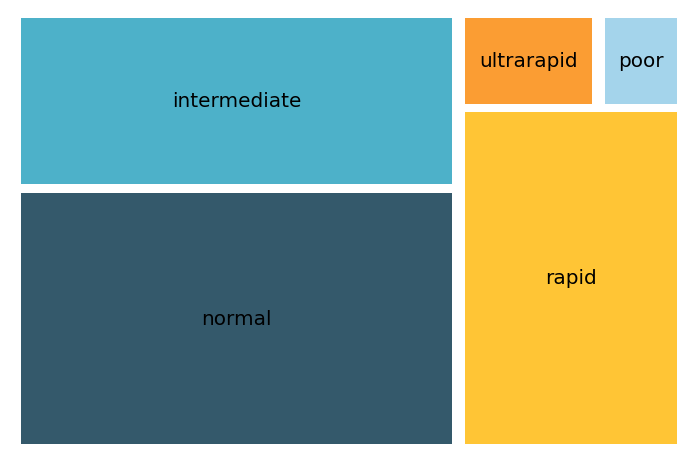

In [82]:
tree_map(cyp2c19_cnt)

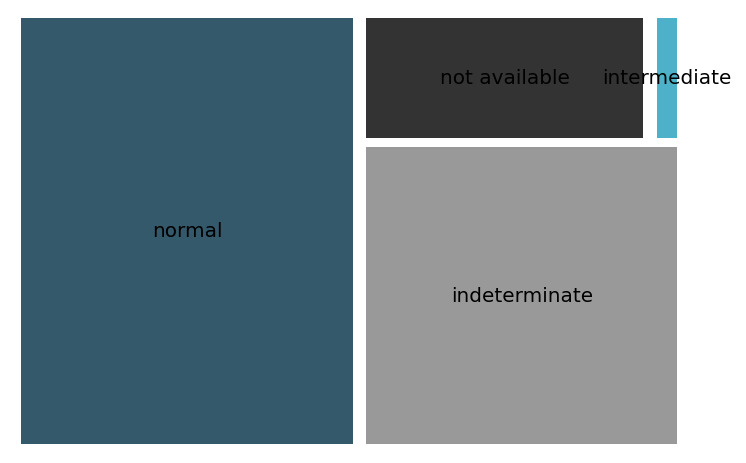

In [83]:
tree_map(cyp2d6_cnt)